Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


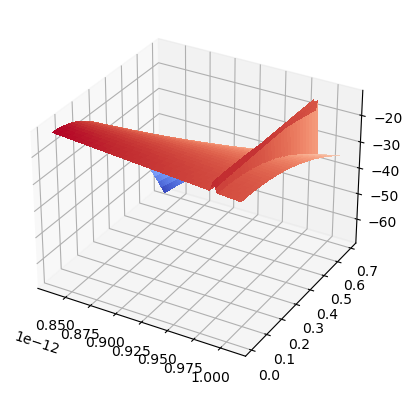

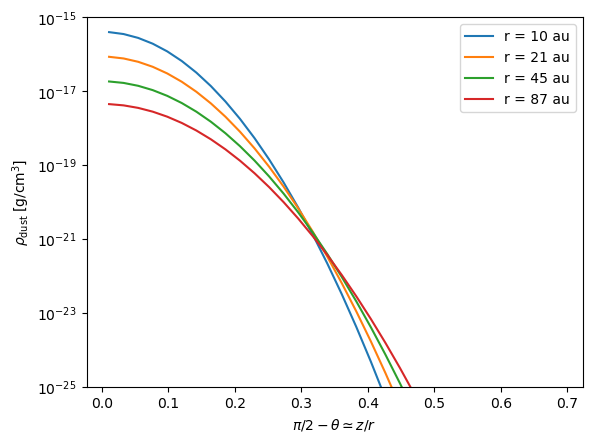

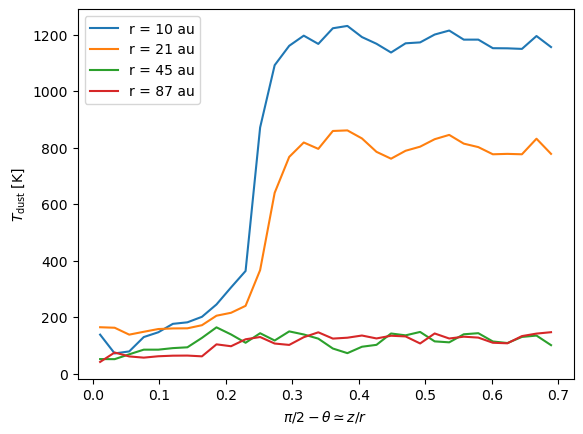

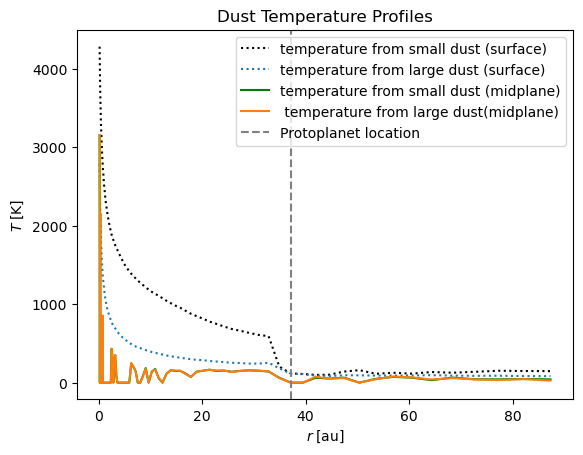

In [5]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt
rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], ':', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], ':', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()


Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


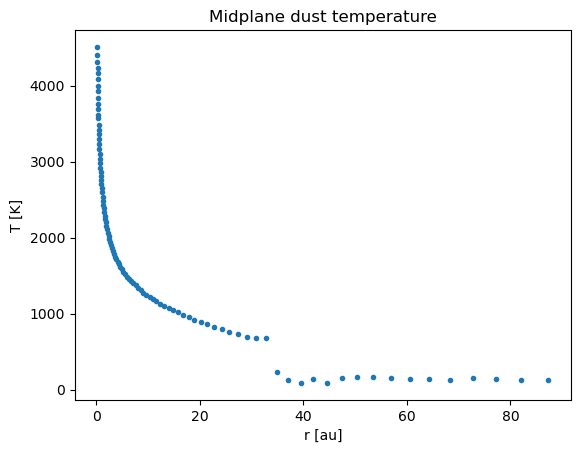

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


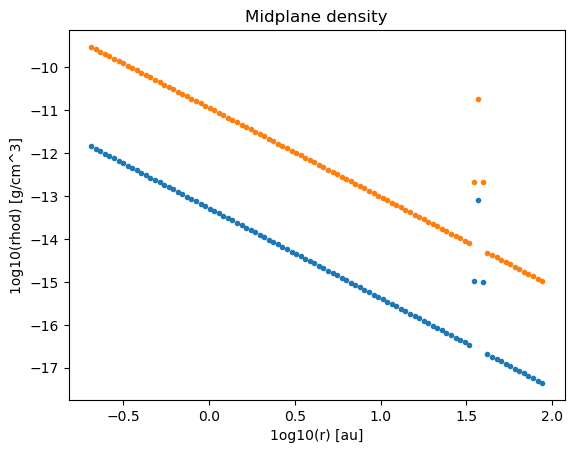

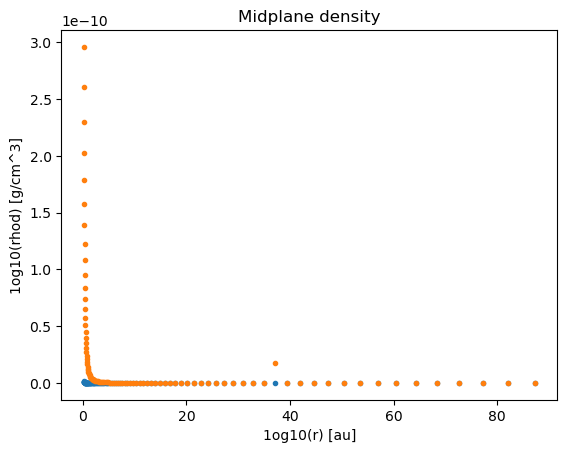

In [3]:
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import numpy as np
import math
import os

from radmc3dPy.analyze import *  
from radmc3dPy.natconst import * 

#
# First set up the model with
#
#   python problem_setup.py
#
# Then make sure to have run
#
#   radmc3d mctherm
#
#os.system('radmc3d mctherm')
#
# to compute the dust temperature before you run this plotting session.
#
# Now plot the temperature profile
#
a    = readData()
r    = a.grid.x[:]
temp = a.dusttemp[:,15,0,0]  #r,theta, phi, last one is pick the first dust species
# shape should be cosistent for different layers
plt.figure()
plt.plot(r/au,temp,'.')
plt.xlabel('r [au]')
plt.ylabel('T [K]')
plt.title('Midplane dust temperature')
plt.show()

#
a    = readData()
r    = a.grid.x[:]
rhodsm = a.rhodust[:,-1,0,0]  #r,theta, phi, last one is pick the zeroth orfirst dust species
rhodbg = a.rhodust[:,-1,0,1]
# shape should be cosistent for different layers
plt.figure()
plt.plot(np.log10(r/au),np.log10(rhodsm),'.')
plt.plot(np.log10(r/au),np.log10(rhodbg),'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


plt.figure()
plt.plot(r/au,rhodsm,'.')
plt.plot(r/au,rhodbg,'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()
